# ONS Data Regression Plot

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [4]:
import numpy as np
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression

In [5]:
ons_data = pd.read_csv('..\data\ONS\ons_filtered.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\becca\AppData\Local\Temp\ipykernel_27032\2831276774.py:1: SyntaxWarning: invalid escape sequence '\d'
  ons_data = pd.read_csv('..\data\ONS\ons_filtered.csv')


In [6]:
ons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    64 non-null     int64  
 1   Year Quarter                                  64 non-null     object 
 2   Gross Domestic Product (£m)                   64 non-null     float64
 3   Unemployment Rate (%)                         64 non-null     float64
 4   CPIH (%)                                      64 non-null     float64
 5   Household Final Consumption Expenditure (£m)  64 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.1+ KB


In [7]:
ons_data.describe()

,Unnamed: 0,Gross Domestic Product (£m),Unemployment Rate (%),CPIH (%),Household Final Consumption Expenditure (£m)
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,31.500000,577804.546875,5.576562,2.754688,354006.015625
std,18.618987,44429.748922,1.653255,2.078074,28089.972712
min,0.000000,481769.000000,3.700000,0.300000,286546.000000
25%,15.750000,536587.000000,4.175000,1.575000,325443.750000
50%,31.500000,579089.000000,4.900000,2.350000,359077.000000
75%,47.250000,615807.500000,7.725000,2.950000,381054.750000
max,63.000000,642287.000000,8.400000,9.400000,389410.000000


In [8]:
ons_data.head(10)

,Unnamed: 0,Year Quarter,Gross Domestic Product (£m),Unemployment Rate (%),CPIH (%),Household Final Consumption Expenditure (£m)
0,0,2009 Q1,509646.0,7.1,2.9,312387.0
1,1,2009 Q2,508009.0,7.8,2.0,311964.0
2,2,2009 Q3,508398.0,7.8,1.4,313410.0
3,3,2009 Q4,509889.0,7.8,1.6,315889.0
4,4,2010 Q1,514595.0,8.0,2.4,314367.0
5,5,2010 Q2,520128.0,7.9,2.5,322185.0
6,6,2010 Q3,523173.0,7.8,2.3,322411.0
7,7,2010 Q4,523515.0,7.9,2.7,321985.0
8,8,2011 Q1,524955.0,7.8,3.5,319260.0
9,9,2011 Q2,525418.0,7.9,3.8,317978.0


In [9]:
ons_data.drop('Unnamed: 0', axis='columns', inplace=True)

In [10]:
ons_data

,Year Quarter,Gross Domestic Product (£m),Unemployment Rate (%),CPIH (%),Household Final Consumption Expenditure (£m)
0,2009 Q1,509646.0,7.1,2.9,312387.0
1,2009 Q2,508009.0,7.8,2.0,311964.0
2,2009 Q3,508398.0,7.8,1.4,313410.0
3,2009 Q4,509889.0,7.8,1.6,315889.0
4,2010 Q1,514595.0,8.0,2.4,314367.0
...,...,...,...,...,...
59,2023 Q4,633011.0,3.9,4.4,383923.0
60,2024 Q1,638746.0,4.3,3.9,386899.0
61,2024 Q2,641670.0,4.2,2.9,387064.0
62,2024 Q3,641675.0,4.3,2.9,389410.0


In [12]:
# ons_data.to_csv('..\data\ONS\ons_filtered.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\becca\AppData\Local\Temp\ipykernel_27032\388720474.py:1: SyntaxWarning: invalid escape sequence '\d'
  ons_data.to_csv('..\data\ONS\ons_filtered.csv')


# Regression Plots
#### Comparing correlation between macroeconomic data

(2.0, 10.215166625830038)

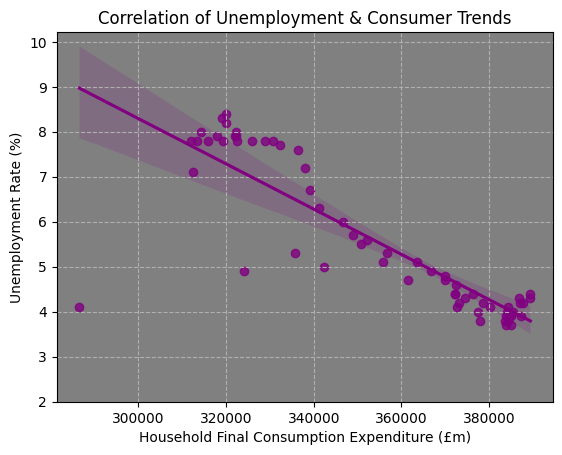

In [13]:
sns.regplot(
    x="Household Final Consumption Expenditure (£m)", 
    y="Unemployment Rate (%)", 
    data=ons_data,
    color='purple'
)

ax = plt.gca()
ax.set_facecolor("grey")
plt.title('Correlation of Unemployment & Consumer Trends')
plt.grid(linestyle='--')
plt.ylim(2,)


#### The above plot below shows a correlation with HFCE(Consumer Trends/Confidence) and Unemployment although there is a visible curve which would suggest polynomial regression would be better suited for this plot.

#### I would also like to look into the outliers on this graph and the reasoning behind this.

(2.0, 10.0)

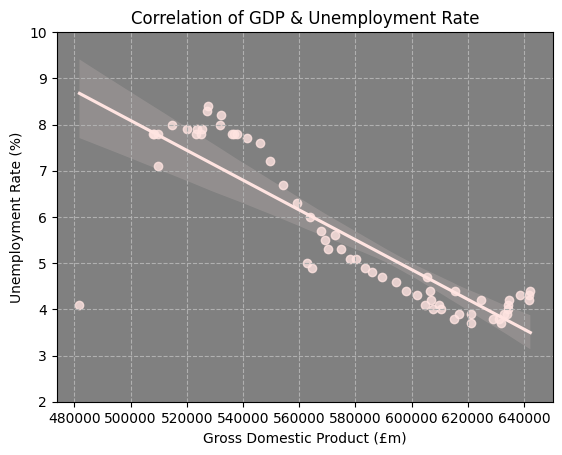

In [14]:
sns.regplot(
    x="Gross Domestic Product (£m)", 
    y="Unemployment Rate (%)", 
    data=ons_data,
    color='mistyrose')

ax = plt.gca()
ax.set_facecolor("grey")
plt.title('Correlation of GDP & Unemployment Rate')
plt.grid(linestyle='--')
plt.ylim(2,10)


#### The above plot below shows a correlation with GDP and Unemployment although there is a visible curve which would suggest polynomial regression would be better suited for this plot.

#### I would also like to look into the outliers on this graph and the reasoning behind this.

(0.0, 9.877359227639925)

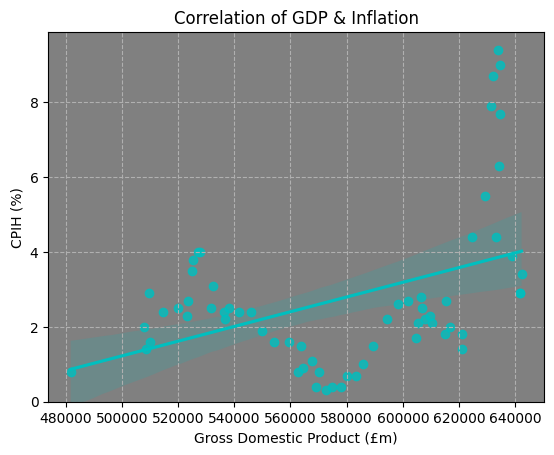

In [15]:
sns.regplot(
    x="Gross Domestic Product (£m)", 
    y="CPIH (%)", 
    data=ons_data,
    color='c')

ax = plt.gca()
ax.set_facecolor("grey")
plt.title('Correlation of GDP & Inflation')
plt.grid(linestyle='--')
plt.ylim(0,)


#### The above plot shows very little correlation between GDP and inflation

(0.0, 9.866221042900937)

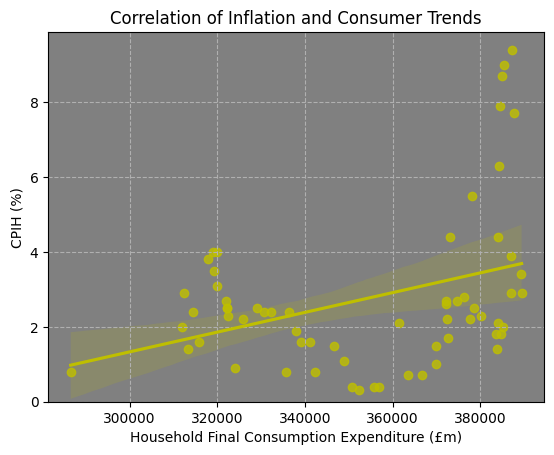

In [16]:
sns.regplot(
    x="Household Final Consumption Expenditure (£m)", 
    y="CPIH (%)", 
    data=ons_data,
    color='y')

ax = plt.gca() 
ax.set_facecolor("grey")
plt.title('Correlation of Inflation and Consumer Trends')
plt.grid(linestyle='--')
plt.ylim(0,)

#### The above plot shows very little correlation between FHCE and CPIH (inflation)

(260000.0, 402055.30385150615)

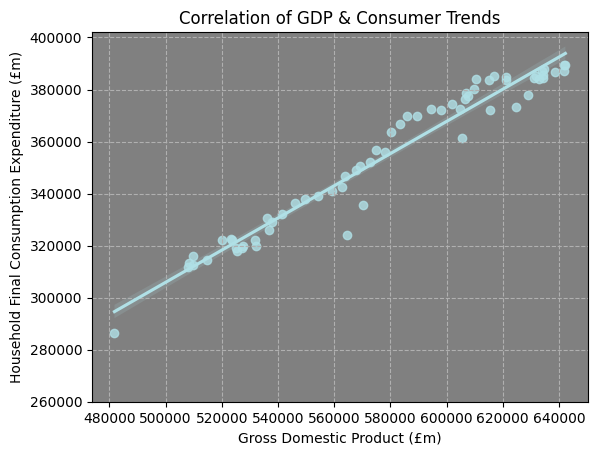

In [17]:
sns.regplot(
    x="Gross Domestic Product (£m)", 
    y="Household Final Consumption Expenditure (£m)", 
    data=ons_data,
    color='powderblue')

ax = plt.gca() 
ax.set_facecolor("grey")
plt.title('Correlation of GDP & Consumer Trends')
plt.grid(linestyle='--')
# plt.style.use('dark_background')
plt.ylim(260000,)


#### The above plot shows strong correlation between GDP and HFCE (consumer confidence/trends)

#### This intercorrelation could impact analysis results 

#### I'd like to look at slices of this data and take a deeper dive into the nuances 

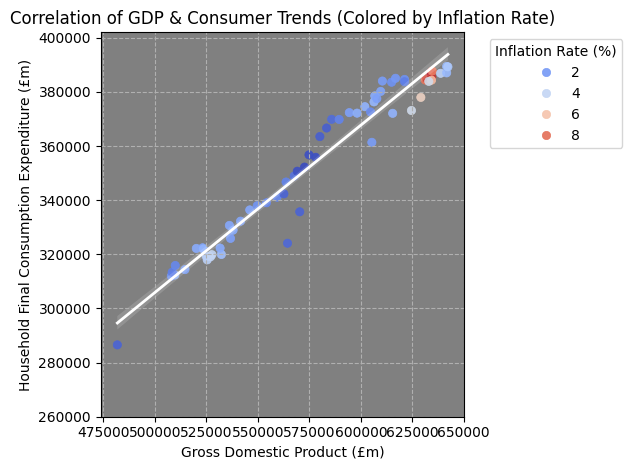

In [18]:
sns.scatterplot(
    x="Gross Domestic Product (£m)",
    y="Household Final Consumption Expenditure (£m)",
    hue="CPIH (%)",  
    palette="coolwarm",  
    data=ons_data,
    edgecolor=None,
    alpha=0.9
)


sns.regplot(
    x="Gross Domestic Product (£m)", 
    y="Household Final Consumption Expenditure (£m)", 
    data=ons_data,
    scatter=False,  
    color='white',
    line_kws={'linewidth': 2}
)


ax = plt.gca()
ax.set_facecolor("grey")
plt.title('Correlation of GDP & Consumer Trends (Colored by Inflation Rate)')
plt.grid(linestyle='--')
plt.ylim(260000,)
plt.legend(title='Inflation Rate (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### The above regression plot is showing the correlation of GDP and HFCE (consumer trends/confidence). The colour gradiant of the scatter plot represents inflation at that time. There is no clear pattern between inflation and the correlation of GDP and Consumer trends/ confidence

#### What I would like to dive deeper into is the 'outliers' on this plot which I will look at below 

In [19]:
X = ons_data[['Gross Domestic Product (£m)']].values
y = ons_data['Household Final Consumption Expenditure (£m)'].values


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


residuals = y - y_pred
z_scores = zscore(residuals)  


ons_data['Residual'] = residuals
ons_data['Z_Score'] = z_scores


threshold = 2.0
ons_data['Outlier'] = np.abs(z_scores) > threshold

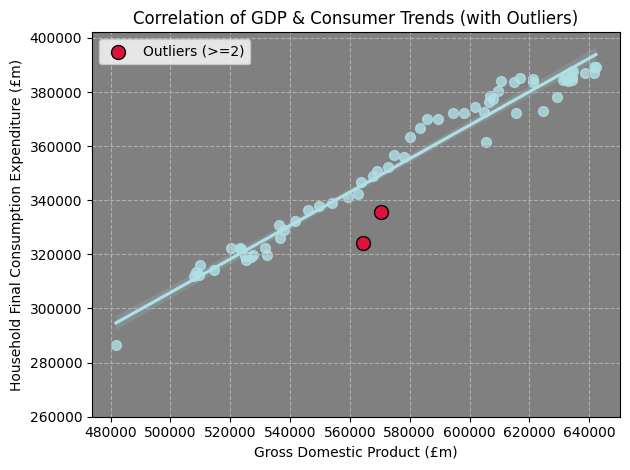

In [20]:
sns.regplot(
    x="Gross Domestic Product (£m)", 
    y="Household Final Consumption Expenditure (£m)", 
    data=ons_data,
    color='powderblue',
    scatter_kws={'s': 50}
)


outliers = ons_data[ons_data['Outlier']]
plt.scatter(
    outliers["Gross Domestic Product (£m)"],
    outliers["Household Final Consumption Expenditure (£m)"],
    color='crimson',
    edgecolor='black',
    s=100,
    label='Outliers (>=2)'
)

# outliers = ons_data[ons_data['Outlier2']]
# plt.scatter(
#     outliers["Gross Domestic Product (£m)"],
#     outliers["Household Final Consumption Expenditure (£m)"],
#     color='darkblue',
#     edgecolor='black',
#     s=100,
#     label='Outliers2'
# )


ax = plt.gca()
ax.set_facecolor("grey")
plt.title('Correlation of GDP & Consumer Trends (with Outliers)')
plt.grid(linestyle='--')
plt.ylim(260000,)
plt.legend()
plt.tight_layout()
plt.show()


#### In the above plot I have highlighted the outliers that are greater than 2

#### A z-score greater than 2 is typically considered an outlier, indicating that the point is more than 2 standard deviations away from the regression line.

#### Below is a view of the outlier datapoints:
- Residuals are the differences between observed and predicted values.
- Z-scores are standardized residuals, showing how far away each residual is from the mean residual, in terms of standard deviations

#### The two outliers were from COVID during the winter lockdown when "Christmas was cancelled". 

#### From analysing the data, the two outliers were after the initial lockdown when both GDP and HFCE when down simultaneously as you'd expect in 2020 Q4/2021 Q1 GDP increased in line with prior quarters where HFCE did not. this could be down to a number of reasons:
- GDP includes government spending (vaccines/furlough etc)
- After the initial lockdown and freeze on all production, manufacturing restarted in the later quarters of 2020
- Although total GDP increased people still could not go out in 2020 Q4/2021 Q1 with hospitality and entertainment venues closed and travel prohibited people were unable to spend even if they wanted to.
- Even though production had restarted there was a backlog and shortage of many products du.ring this time


In [21]:
ons_data[ons_data['Outlier']]


,Year Quarter,Gross Domestic Product (£m),Unemployment Rate (%),CPIH (%),Household Final Consumption Expenditure (£m),Residual,Z_Score,Outlier
47,2020 Q4,570338.0,5.3,0.8,335721.0,-13668.902690,-2.344066,True
48,2021 Q1,564411.0,4.9,0.9,324105.0,-21620.598182,-3.707694,True


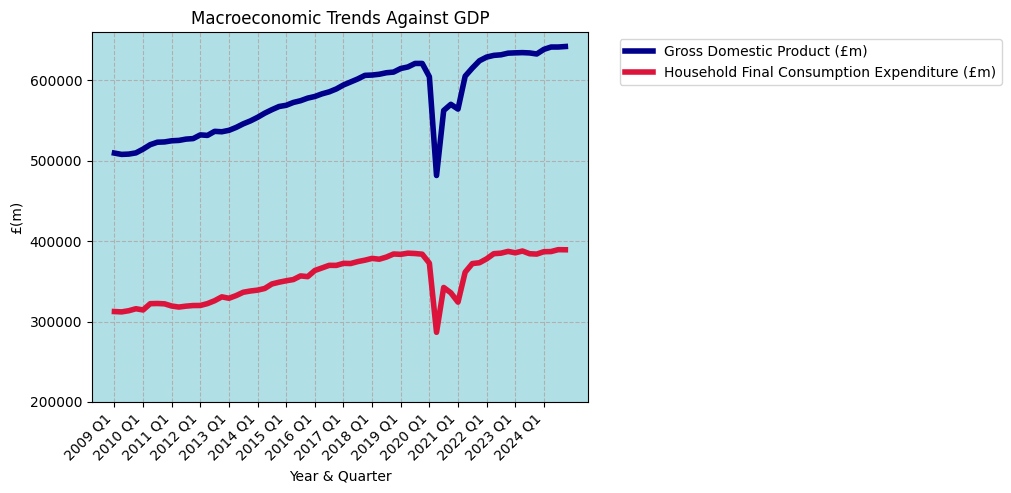

In [22]:
x = ons_data['Year Quarter']
y = ['Gross Domestic Product (£m)', 'Household Final Consumption Expenditure (£m)']

colors = ['darkblue', 'crimson']

# for i in y:
#     plt.plot(x,ons_data[i], label=i, linewidth=4) # if removing the colours, use this line of code

for var_name, color in zip(y, colors):
    plt.plot(x, ons_data[var_name], label=var_name, linewidth=4, color=color)

ax = plt.gca() 
ax.set_facecolor("powderblue")
plt.title('Macroeconomic Trends Against GDP')
plt.ylabel('£(m)')
plt.xlabel('Year & Quarter')
# plt.figure(figsize=(10,6))

xtick_spacing = 4  # showing every 1st quarter 
plt.xticks(ticks=range(0, len(x), xtick_spacing), labels=x[::xtick_spacing], rotation=45, ha='right')
# plt.xticks(ticks=x[::xtick_spacing], labels=x[::xtick_spacing], rotation=45, ha='right') # if removing the colours, use this line of code
# plt.xticks(x, rotation=45, ha='right')
# plt.xticks(x)
plt.ylim(200000,)
plt.grid(linestyle='--')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Looking at GDP & HFCE further the above plot shows strong intercorrelation between these two metrics. (I had to plot only the first quarter so the year and quarter were readable). This could impact our analysis especially when using statistical models like regression 

#### These two metrics could be combined and we may be able to use one to represent the other to simplify our model without significant loss of information. 

#### So for looking at the impact of economic growth on consumer spending, being able to replace HFCE with GDP as a measure of the economy's overall performance.

In [23]:
X = ons_data[['Gross Domestic Product (£m)']].values
y = ons_data['Household Final Consumption Expenditure (£m)'].values


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


residuals = y - y_pred
z_scores = zscore(residuals)  


ons_data['Residual'] = residuals
ons_data['Z_Score'] = z_scores


threshold1 = 2.0
threshold2 = 1.0

ons_data['Outlier1'] = np.abs(z_scores) > threshold1
ons_data['Outlier2'] = (np.abs(z_scores) > threshold2) & (np.abs(z_scores) <= threshold1)

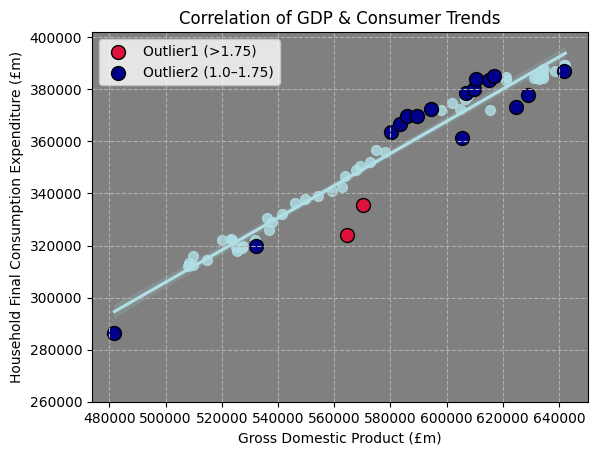

In [24]:
ax = plt.gca()
ax.set_facecolor("grey")

sns.regplot(
    x="Gross Domestic Product (£m)", 
    y="Household Final Consumption Expenditure (£m)", 
    data=ons_data,
    color='powderblue',
    scatter_kws={'s': 50}
)

outlier1 = ons_data[ons_data['Outlier1']]
plt.scatter(
    outlier1["Gross Domestic Product (£m)"], 
    outlier1["Household Final Consumption Expenditure (£m)"],
    color='crimson', label='Outlier1 (>1.75)', s=100, edgecolor='black')


outlier2 = ons_data[ons_data['Outlier2']]
plt.scatter(
    outlier2["Gross Domestic Product (£m)"], 
    outlier2["Household Final Consumption Expenditure (£m)"],
    color='darkblue', label='Outlier2 (1.0–1.75)', s=100, edgecolor='black')


plt.title('Correlation of GDP & Consumer Trends')
plt.xlabel('Gross Domestic Product (£m)')
plt.ylabel('Household Final Consumption Expenditure (£m)')
plt.grid(linestyle='--')
plt.ylim(260000,)
plt.legend()
plt.show()

In [25]:
ons_data.loc[ons_data['Outlier1'] & ons_data['Outlier2']]

,Year Quarter,Gross Domestic Product (£m),Unemployment Rate (%),CPIH (%),Household Final Consumption Expenditure (£m),Residual,Z_Score,Outlier,Outlier1,Outlier2
